# Initialize Project Ecommerce Lite

In [1]:
import pandas as pd

# Read the data
data = pd.read_csv('ecommerce_lite.csv')

# Print the first five rows
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,572300,22423,REGENCY CAKESTAND 3 TIER,2.0,10/23/2011 14:40,12.75,18005.0,United Kingdom
1,568984,22505,MEMO BOARD COTTAGE DESIGN,1.0,9/29/2011 15:57,4.95,17813.0,United Kingdom
2,573333,84997D,CHILDRENS CUTLERY POLKADOT PINK,4.0,10/30/2011 11:34,4.15,12483.0,Sweden
3,551988,22673,FRENCH GARDEN SIGN BLUE METAL,12.0,5/5/2011 15:08,1.25,12576.0,Poland
4,572070,21137,BLACK RECORD COVER FRAME,24.0,10/20/2011 13:37,3.39,15587.0,United Kingdom


### Descriptive Statistics Calculations

In [14]:
data['Quantity'].value_counts() # Counting the number of each value in the column, mode revealed

1.0      7151
12.0     5992
2.0      5870
6.0      3748
4.0      3093
         ... 
270.0       1
43.0        1
54.0        1
89.0        1
468.0       1
Name: Quantity, Length: 133, dtype: int64

In [16]:
data['Quantity'].describe() # Descriptive statistics(Mean, median(Q2), Quartiles)

count    39411.000000
mean        12.582401
std         42.461230
min          1.000000
25%          2.000000
50%          6.000000
75%         12.000000
max       4300.000000
Name: Quantity, dtype: float64

In [20]:
# Calculate IQR

IQR = data['Quantity'].quantile(0.75) - data['Quantity'].quantile(0.25)
print(f'IQR: {IQR}')

IQR: 10.0


### Identifying Outliers

In [18]:
batas_bawah = data['Quantity'].quantile(0.25) - 1.5 * IQR
batas_atas = data['Quantity'].quantile(0.75) + 1.5 * IQR

print(f'Batas bawah: {batas_bawah:.2f}')
print(f'Batas atas: {batas_atas:.2f}')

outliers = data[(data['Quantity'] < batas_bawah) | (data['Quantity'] > batas_atas)]
print(f'Jumlah outliers: {len(outliers)}')

Batas bawah: -13.00
Batas atas: 27.00
Jumlah outliers: 2512


### Generate Histogram

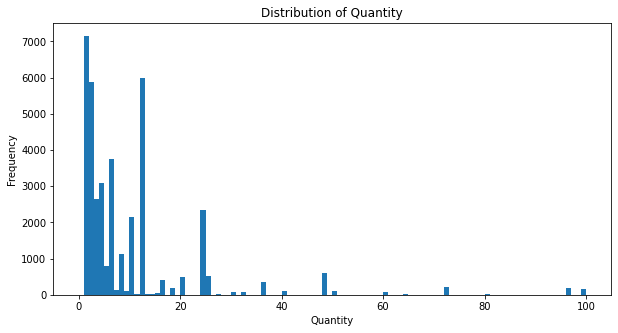

In [5]:
import matplotlib.pyplot as plt

# Create Histogram
plt.figure(figsize=(10, 5))
plt.hist(data['Quantity'], bins=100, range=(0, 100))
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')
plt.show()

# Visualisasi Data

### Total Sales for Stock Code = '2243' for each country

Country
Australia          32.0
Belgium             3.0
EIRE               33.0
France             34.0
Germany           105.0
Greece             16.0
Norway              4.0
United Kingdom    861.0
Name: Quantity, dtype: float64


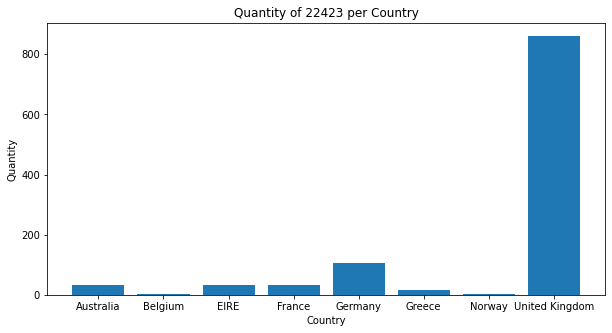

In [6]:
import matplotlib.pyplot as plt

data_22423 = data.loc[data['StockCode'] == '22423']

data_22423_country = data_22423.groupby('Country')['Quantity'].sum()

print(data_22423_country)

plt.figure(figsize=(10, 5))
plt.bar(data_22423_country.index, data_22423_country.values)
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.title('Quantity of 22423 per Country')
plt.show()

### Percentage Sales for StockCode = '2243' for each country

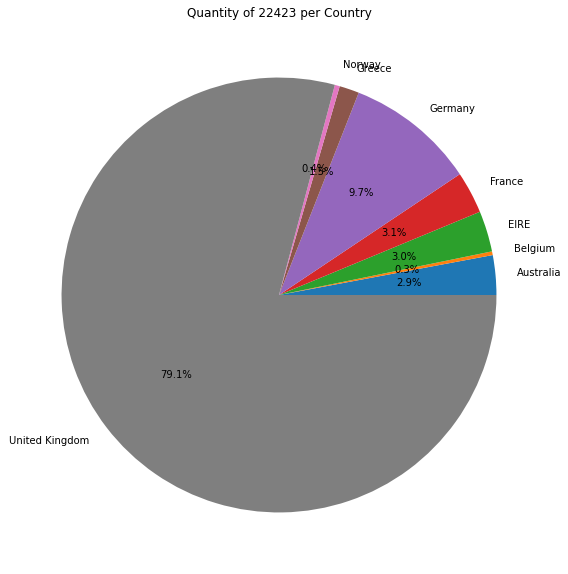

In [7]:
# Generate pie chart
plt.figure(figsize=(10, 10))
plt.pie(data_22423_country.values, labels=data_22423_country.index, autopct='%1.1f%%')
plt.title('Quantity of 22423 per Country')
plt.show()

### Top Five Highest Sales Rate based on StockCode

StockCode
22197     7770.0
85099B    6675.0
85123A    6461.0
84077     3916.0
21212     3629.0
Name: Quantity, dtype: float64


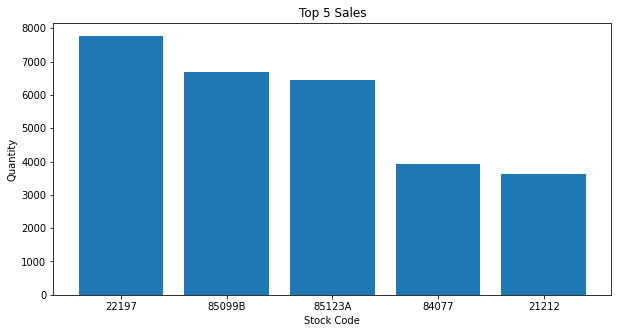

In [8]:
data_sales = data.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head()
print(data_sales)

plt.figure(figsize=(10, 5))
plt.bar(data_sales.index, data_sales.values)
plt.xlabel('Stock Code')
plt.ylabel('Quantity')
plt.title('Top 5 Sales')
plt.show()